#                             Parkinson - Disease -Classifier

## Let Us Import some libraries



In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


#### Data
Data is read from file which was created from data_file.py using data from the dataset

In [47]:
data = pd.read_csv("file.csv")


In [48]:
data

,pressure,grip_angle,timestamp,state,status
0,884.200931,794.317300,115.650000,static,1
1,910.966791,662.641217,115.650000,dynamic,1
2,NaN,NaN,0.000000,circular,1
3,788.450502,782.556671,1052.316667,static,1
4,926.910511,902.801802,1052.316667,dynamic,1
...,...,...,...,...,...
226,566.743542,577.607638,268.833333,dynamic,0
227,613.129992,686.018125,268.833333,circular,0
228,532.731178,603.585907,268.833333,static,0
229,566.743542,577.607638,268.833333,dynamic,0


Let's check if have any missing data

In [49]:
print(data.isnull().values.any())

True


* How many missing values for each feature

In [50]:
print(data.isnull().sum())

pressure      29
grip_angle    29
timestamp      0
state          0
status         0
dtype: int64


###### we have missing data in pressure and grip angle lets remove all the missing data

In [51]:
data = data.dropna() 

let us now look at the data after removing all the missing data

In [52]:
data

,pressure,grip_angle,timestamp,state,status
0,884.200931,794.317300,115.650000,static,1
1,910.966791,662.641217,115.650000,dynamic,1
3,788.450502,782.556671,1052.316667,static,1
4,926.910511,902.801802,1052.316667,dynamic,1
6,843.550013,903.502152,1228.116667,static,1
...,...,...,...,...,...
226,566.743542,577.607638,268.833333,dynamic,0
227,613.129992,686.018125,268.833333,circular,0
228,532.731178,603.585907,268.833333,static,0
229,566.743542,577.607638,268.833333,dynamic,0


* we have removed the row which contains null values,let's check again 

In [53]:
print(data.isnull().sum())

pressure      0
grip_angle    0
timestamp     0
state         0
status        0
dtype: int64


In [54]:
X=data.drop('status',axis=1)
y=data['status']

## Lets split the data using in-built functions from the sklearn library 

In [55]:
# Let us now split the data into train and test before it shuffle the data

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state= 42, shuffle=True)


##### Print the shapes of training and test datasets

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(161, 4)
(161,)
(41, 4)
(41,)


### Lets Look at our shuffled data

In [57]:
print("Train Data:",'\n', X_train.head() )
print('\n',"Test Data:",'\n', X_test.head())

Train Data: 
        pressure   grip_angle      timestamp     state
228  532.731178   603.585907     268.833333    static
46   478.082488   992.984379    1832.233333   dynamic
32     0.000000  1663.111979  136795.166667  circular
138  702.376674  1394.885529     691.216667    static
226  566.743542   577.607638     268.833333   dynamic

 Test Data: 
        pressure   grip_angle      timestamp     state
104  378.284667  1075.520000     325.133333  circular
22   532.802145  1400.946777     196.683333   dynamic
38     0.000000  1663.111979  163301.800000  circular
188  471.240627   561.264689     176.750000  circular
215  199.375050   682.022608     217.666667  circular


## Random Forest Classifier
 ###### Let's add the 4 Features from the file  and train our  model  

In [58]:
'''
RANDOM FOREST MODEL FOR CLASSIFICATION
'''

features = ["pressure","grip_angle","timestamp","state"]

X = pd.get_dummies(X_train[features])
X_test = pd.get_dummies(X_test[features])

model = RandomForestClassifier(n_estimators = 50,max_depth = 4 ,random_state= 0) 
model.fit(X,y_train)
y_pred = model.predict(X_test)
print("Accuracy of Random Forest:",metrics.accuracy_score(y_test, y_pred))


Accuracy of Random Forest: 0.926829268292683


Bingo! we have got an accuracy of 0.926829268292683
Tune the hyperparameters to get more accuracy

### Let's look at
* Confusion Matrix
* Precision
* Recall

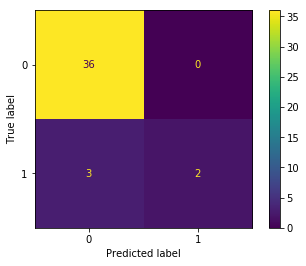

In [59]:
plot_confusion_matrix(model, X_test, y_test)


In [69]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
print("Precision:" , precision)
print("Recall:",recall)


Precision: [0.12195122 1.         1.        ]
Recall: [1.  0.4 0. ]


# Logistic Regression

In [26]:
'''
LOGISTIC REGRESSION MODEL FOR CLASSIFICATION
'''
model2 = LogisticRegression(penalty= 'l2' ,random_state= 10 ,max_iter=100,solver='liblinear').fit(X,y_train)
y_pred2 = model2.predict(X_test)

print("Accuracy of Logistic regression:",metrics.accuracy_score(y_test, y_pred2))

Accuracy of Logistic regression: 0.9024390243902439


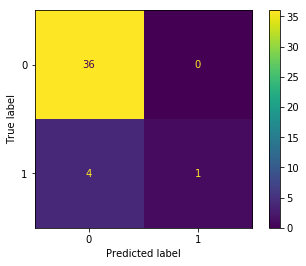

In [27]:
plot_confusion_matrix(model2, X_test, y_test)


Note: This file is still to be updated